# Interpolation: Newton's Divided Difference

* We are going to use Newton's divided difference to find an interpolating polynomial
* Input: Data points (x,y)
* Output: Coefficients for the polynomial, and the polynomial p(x)

In [84]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
def newtdd(x0,y0,n):
    coeff = np.zeros(n)
    v = np.zeros((n,n))
    
    # filling the y column of the newton triangle
    for i in range(0,n):
        v[i,0] = y0[i]
    
    for i in range(1,n):
        for j in range(0,n-i):
            v[j,i] = (v[j+1,i-1] - v[j,i-1])/(x0[j+i]-x0[j])
    # Getting the values of the coefficients
    for i in range(0,n):
        coeff[i] = v[0,i]
        
    # Creating the Polynomial
    x = Symbol('x')
    pol = coeff[0]
    q = [1]
    for i in range(1,len(x0)):
        q.append(q[i-1]*(x-x0[i-1]))
    for i in range(1,len(x0)):
        pol = pol + coeff[i]*q[i]
    
    return [coeff,pol]

# x0 = [-1,0,2,3]
y0 = [-5,-1,1,11]
coeff_pol = newtdd(x0,y0,len(x0))
print(coeff_pol[1])


# Plotting the polynomial

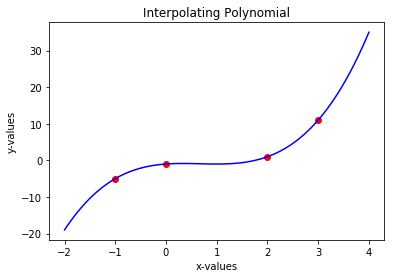

In [89]:
x_values = np.linspace(-2,4,101)
f = lambdify(x, coeff_pol[1])
plt.plot(x_values,f(x_values),c='b')
plt.scatter(x0,y0,c='r')
plt.xlabel("x-values")
plt.ylabel("y-values")
plt.title("Interpolating Polynomial")